In [2]:
import numpy as np
from diffusion import get_ddpm
import torch
import pandas as pd
import matplotlib.pyplot as plt
from config import load_config
from utils import get_compute_fid, get_data_tensor


def prepare_fid_df(df):
    df = df.drop("Unnamed: 0", axis=1)
    df = df.pivot(index="n_steps", columns=["noise_schedule", "step_type"], values="fid")
    df.columns = [f"{ns} | {st}" for ns, st in df.columns]
    return df

/home/coder/.local/lib/python310-conda-cuda-torch21/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/home/coder/.local/lib/python310-conda-cuda-torch21/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


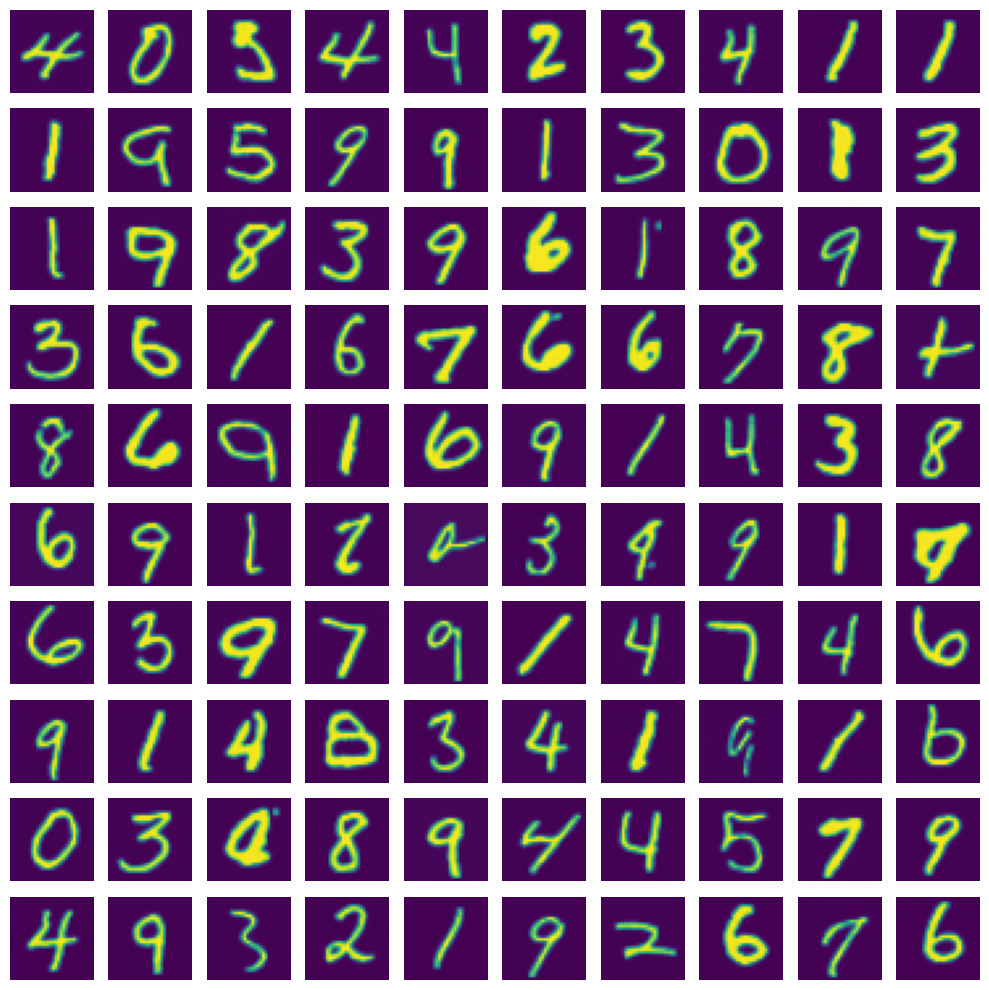

In [1]:
config = load_config()
# compute_fid = get_compute_fid(config)
x = np.load(config.samples_path)["x"]

plt.figure(figsize=(10, 10))
for i in range(10):
    for j in range(10):
        plt.subplot(10, 10, 10 * i + j + 1)
        plt.imshow(x[10 * i + j, 0])
        plt.axis("off")

plt.tight_layout()
plt.show()

# MNIST

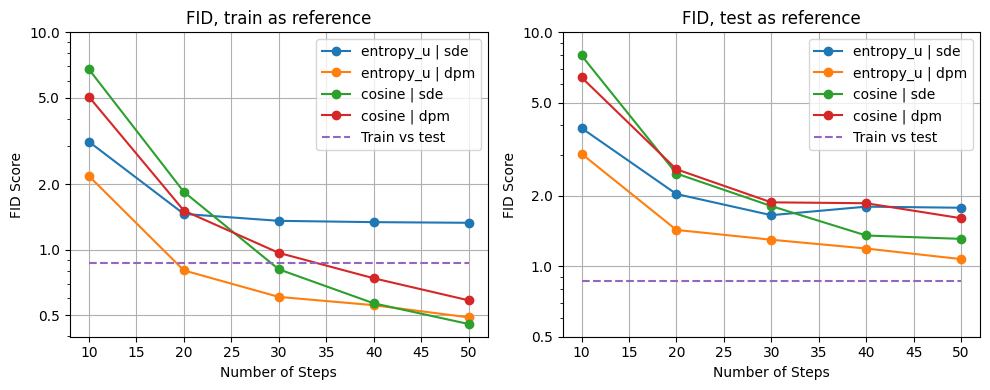

In [2]:
df_train = prepare_fid_df(pd.read_csv("results/fid.csv"))
df_test = prepare_fid_df(pd.read_csv("results/fid_vs_test.csv"))

config = load_config()
config.fid.train = True
train_test_fid = get_compute_fid(config)(get_data_tensor(config, train=False))


fig, axes = plt.subplots(1, 2, figsize=(10, 4))

for df, train_test, ax in zip([df_train, df_test], ["train", "test"], axes):
    df.plot(marker="o", ax=ax)
    ax.plot(df.index, [train_test_fid] * len(df), linestyle="--", label="Train vs test")
    ax.set_xlabel("Number of Steps")
    ax.set_ylabel("FID Score")
    ax.set_title(f"FID, {train_test} as reference")
    ax.legend()
    ax.grid(True)
    ax.set_yscale("log")
    yticks = [0.5, 1., 2., 5., 10.]
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticks)

plt.tight_layout()
plt.show()

In [3]:
df_train

,entropy_u | sde,entropy_u | dpm,cosine | sde,cosine | dpm
n_steps,,,,
10,3.138610,2.183182,6.752631,5.049476
20,1.462124,0.804118,1.846609,1.514572
30,1.359221,0.607563,0.813665,0.968268
40,1.340613,0.556645,0.567746,0.740202
50,1.331440,0.489348,0.456026,0.585990


In [4]:
df_test

,entropy_u | sde,entropy_u | dpm,cosine | sde,cosine | dpm
n_steps,,,,
10,3.897680,3.027898,7.965604,6.420963
20,2.036848,1.430537,2.491290,2.599093
30,1.653907,1.298847,1.809197,1.876413
40,1.798515,1.191258,1.354023,1.860299
50,1.779295,1.073229,1.309861,1.605159


# CIFAR10

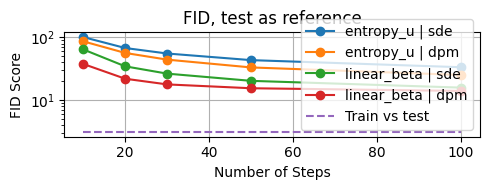

In [6]:
# df_train = prepare_fid_df(pd.read_csv("results/fid.csv"))
df_test = prepare_fid_df(pd.read_csv("results/cifar10_test_fid.csv"))

config = load_config()
config.fid.train = True
train_test_fid = get_compute_fid(config)(get_data_tensor(config, train=False))

df_test.plot(marker="o", figsize=(5, 2))
plt.plot(df_test.index, [train_test_fid] * len(df_test), linestyle="--", label="Train vs test")
plt.xlabel("Number of Steps")
plt.ylabel("FID Score")
plt.title(f"FID, test as reference")
plt.legend()
plt.grid(True)
plt.yscale("log")

plt.tight_layout()
plt.show()

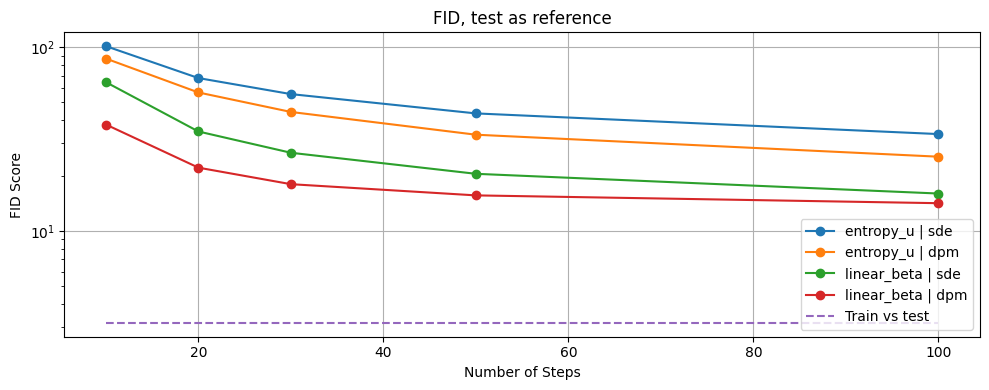

In [8]:
df_test.plot(marker="o", figsize=(10, 4))
plt.plot(df_test.index, [train_test_fid] * len(df_test), linestyle="--", label="Train vs test")
plt.xlabel("Number of Steps")
plt.ylabel("FID Score")
plt.title(f"FID, test as reference")
plt.legend()
plt.grid(True)
plt.yscale("log")

plt.tight_layout()
plt.show()